In [2]:
from __future__ import print_function

import sys
import numpy as np
import pylab

import talib
from talib.abstract import Function

# TEST_LEN = int(sys.argv[1]) if len(sys.argv) > 1 else 100
TEST_LEN = 100
r = np.arange(TEST_LEN)
idata = np.random.random(TEST_LEN)

In [3]:
def func_example():
    odata = talib.MA(idata)
    upper, middle, lower = talib.BBANDS(idata)
    kama = talib.KAMA(idata)
    plot(odata, upper, middle, lower, kama)

def abstract_example():
    sma = Function('sma')
    input_arrays = sma.get_input_arrays()
    for key in input_arrays.keys():
        input_arrays[key] = idata
    sma.set_input_arrays(input_arrays)
    odata = sma(30) # timePeriod=30, specified as an arg

    bbands = Function('bbands', input_arrays)
    bbands.parameters = {
        'timeperiod': 20,
        'nbdevup': 2,
        'nbdevdn': 2
    }
    upper, middle, lower = bbands() # multiple output values unpacked (these will always have the correct order)

    kama = Function('kama').run(input_arrays) # alternative run() calling method.
    plot(odata, upper, middle, lower, kama)

def plot(odata, upper, middle, lower, kama):
    pylab.plot(r, idata, 'b-', label="original")
    pylab.plot(r, odata, 'g-', label="MA")
    pylab.plot(r, upper, 'r-', label="Upper")
    pylab.plot(r, middle, 'r-', label="Middle")
    pylab.plot(r, lower, 'r-', label="Lower")
    pylab.plot(r, kama, 'g', label="KAMA")
    pylab.legend()
    pylab.show()

All functions (sorted by group):
Cycle Indicators functions: ['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE']
Math Operators functions: ['ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM']
Math Transform functions: ['ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH']
Momentum Indicators functions: ['ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR']
Overlap Studies functions: ['BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA']
Pattern Recognition functions: ['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOU

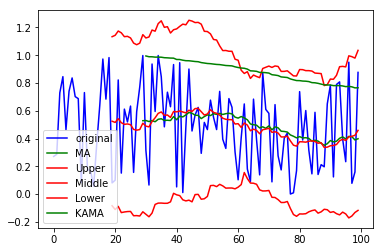

In [4]:
if __name__ == '__main__':
    print('All functions (sorted by group):')
    groups = talib.get_function_groups()
    for group, functions in sorted(groups.items()):
        print('%s functions: %s' % (group, functions))

    if len(sys.argv) == 1 or sys.argv[1] == 'func':
        print('Using talib.func')
        func_example()
    else:
        print('Using talib.abstract')
        abstract_example()